In [35]:
!pip install deepxde

In [36]:
import deepxde as dde
from deepxde.backend import tf
import numpy as np
import matplotlib.pyplot as plt

In [37]:
k = 0.4
L = 1
n = 1

In [38]:
geom = dde.geometry.Interval(0,L)
timedomain = dde.geometry.TimeDomain(0,n)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [39]:
ic = dde.icbc.IC(geomtime, lambda x: np.sin(n* np.pi * x[:,0:1]/L), lambda _, on_initial: on_initial)

In [40]:
input_array = np.array([[1,2,3],
                       [4,5,6],
                       [7,8,9]])
lambda_function = lambda x: 2*x[:,0:1]

result_array = lambda_function(input_array)

print(result_array)

[[ 2]
 [ 8]
 [14]]


In [41]:
cond_lambda = lambda x: "Even" if x % 2 == 0 else "Odd"
print(cond_lambda(4))
print(cond_lambda(3))

Even
Odd


In [42]:
def double_first_column(input_array):
  print("input_array: ", input_array)
  print("input_array.shape: ", input_array.shape)
  print("input_array[:, 0:1]: ", input_array[:, 0:1])
  print("input_array[:, 0:1].shape: ", input_array[:, 0:1].shape)
  print("input_array[:, 0]: ", input_array[:, 0])
  print("input_array[:, 0].shape: ", input_array[:, 0].shape)
  return 2 * input_array[:, 0:1]

bc = dde.icbc.DirichletBC(
    geomtime,
    lambda input_array: double_first_column(input_array),
    lambda _,
    on_boundary: on_boundary)

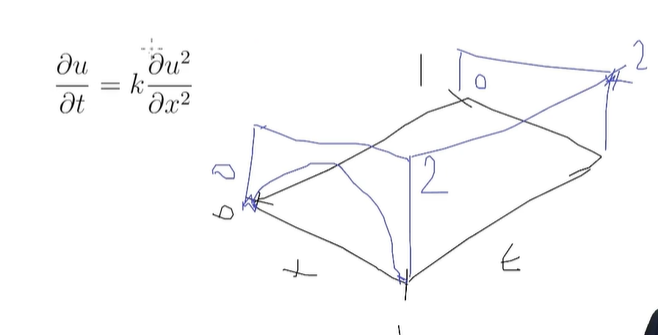

In [43]:
def pde(comp,u):
  du_t = dde.grad.jacobian(u,comp, i=0, j=1)
  du_xx = dde.grad.hessian(u,comp, i=0, j=0)
  return du_t - k * du_xx

In [44]:
data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc,ic],
    num_domain=2540,
    num_boundary=80,
    num_initial=160,
    num_test=2540,
)

In [45]:
net = dde.nn.FNN([2] + [20]*3 + [1], "tanh", "Glorot normal")

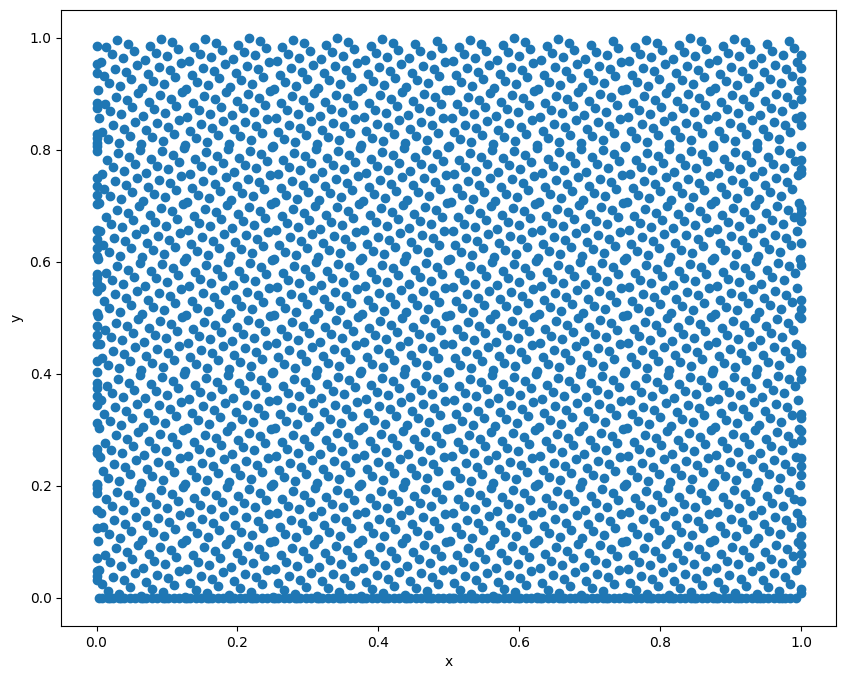

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(data.train_x_all[:,0], data.train_x_all[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [47]:
model = dde.Model(data, net)

In [48]:
model.compile("adam", lr=1e-3)

Compiling model...
Building feed-forward neural network...
'build' took 0.057940 s

input_array:  [[1.        0.1328125]
 [1.        0.9453125]
 [1.        0.6328125]
 [0.        0.625    ]
 [0.        0.828125 ]
 [0.        0.2578125]
 [0.        0.9375   ]
 [0.        0.609375 ]
 [1.        0.7578125]
 [0.        0.125    ]
 [1.        0.390625 ]
 [1.        0.140625 ]
 [1.        0.4375   ]
 [0.        0.484375 ]
 [0.        0.5625   ]
 [0.        0.953125 ]
 [0.        0.375    ]
 [0.        0.46875  ]
 [1.        0.0625   ]
 [1.        0.0078125]
 [1.        0.859375 ]
 [1.        0.515625 ]
 [0.        0.0703125]
 [0.        0.3125   ]
 [0.        0.15625  ]
 [0.        0.046875 ]
 [0.        0.8203125]
 [1.        0.234375 ]
 [1.        0.921875 ]
 [0.        0.453125 ]
 [1.        0.84375  ]
 [0.        0.734375 ]
 [1.        0.765625 ]
 [0.        0.8125   ]
 [0.        0.359375 ]
 [0.        0.1953125]
 [0.        0.203125 ]
 [0.        0.546875 ]
 [0.        0.5078125]
 [1. 

In [49]:
LossHistory, train_state = model.train(iterations=15000)

Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.74e-03, 1.59e+00, 3.81e-01]    [3.38e-03, 1.59e+00, 3.81e-01]    []  
1000      [6.75e-03, 6.20e-02, 1.44e-01]    [5.22e-03, 6.20e-02, 1.44e-01]    []  
2000      [3.21e-03, 2.45e-02, 1.46e-02]    [2.41e-03, 2.45e-02, 1.46e-02]    []  
3000      [1.73e-03, 1.65e-02, 1.17e-02]    [1.10e-03, 1.65e-02, 1.17e-02]    []  
4000      [1.56e-03, 1.13e-02, 9.51e-03]    [8.67e-04, 1.13e-02, 9.51e-03]    []  
5000      [1.38e-03, 8.25e-03, 8.05e-03]    [8.32e-04, 8.25e-03, 8.05e-03]    []  
6000      [1.24e-03, 6.37e-03, 6.73e-03]    [9.85e-04, 6.37e-03, 6.73e-03]    []  
7000      [1.26e-03, 5.16e-03, 5.68e-03]    [1.04e-03, 5.16e-03, 5.68e-03]    []  
8000      [1.34e-03, 4.40e-03, 4.91e-03]    [1.09e-03, 4.40e-03, 4.91e-03]    []  
9000      [1.29e-03, 3.85e-03, 4.36e-03]    [1.14e-03, 3.85e-03, 4.36e-03]    []  
10000     [1.56e-03, 3.54e-03, 3.81e-03]    [1.11e-03, 3.54e-

In [50]:
model.compile("L-BFGS-B")
LossHistory, train_state = model.train()

Compiling model...
input_array:  [[1.        0.1328125]
 [1.        0.9453125]
 [1.        0.6328125]
 [0.        0.625    ]
 [0.        0.828125 ]
 [0.        0.2578125]
 [0.        0.9375   ]
 [0.        0.609375 ]
 [1.        0.7578125]
 [0.        0.125    ]
 [1.        0.390625 ]
 [1.        0.140625 ]
 [1.        0.4375   ]
 [0.        0.484375 ]
 [0.        0.5625   ]
 [0.        0.953125 ]
 [0.        0.375    ]
 [0.        0.46875  ]
 [1.        0.0625   ]
 [1.        0.0078125]
 [1.        0.859375 ]
 [1.        0.515625 ]
 [0.        0.0703125]
 [0.        0.3125   ]
 [0.        0.15625  ]
 [0.        0.046875 ]
 [0.        0.8203125]
 [1.        0.234375 ]
 [1.        0.921875 ]
 [0.        0.453125 ]
 [1.        0.84375  ]
 [0.        0.734375 ]
 [1.        0.765625 ]
 [0.        0.8125   ]
 [0.        0.359375 ]
 [0.        0.1953125]
 [0.        0.203125 ]
 [0.        0.546875 ]
 [0.        0.5078125]
 [1.        0.015625 ]
 [1.        0.90625  ]
 [0.        0.5703125]
 

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


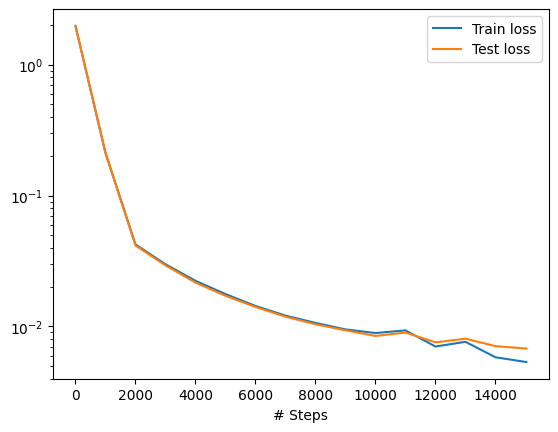

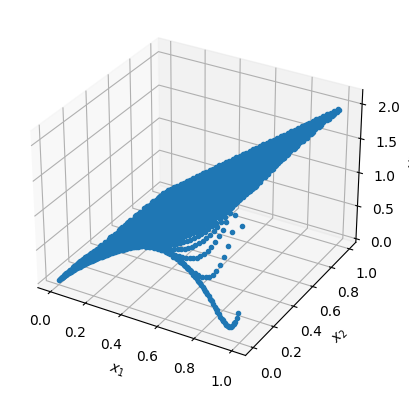

In [51]:
dde.saveplot(LossHistory, train_state, issave=True, isplot=True)